In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
#pip install opencv-contrib-python

In [3]:
config_file="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="frozen_inference_graph.pb"

In [4]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels=[]
file_name='label.txt'

In [6]:
with open(file_name,"rt") as fpt:
    classLabels=fpt.read().rstrip("\n").split("\n")

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'potted plant', 'bed', 'dining table', 'toilet', 'TV monitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair dryer', 'toothbrush']


In [8]:
print(len(classLabels))

80


In [9]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 000001B5549D6550>

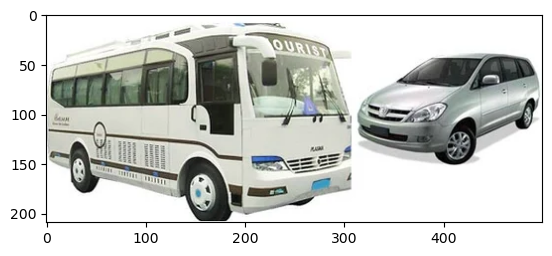

In [10]:
img=cv2.imread('cd.png')
plt.imshow(img)

In [11]:
classIndex,confidence,bbox=model.detect(img,confThreshold=0.5)

In [12]:
print(classIndex)

[6 3]


In [13]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for classInd,conf,boxes in zip(classIndex.flatten(
                       ),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[classInd-1],(
        boxes[0]+10,boxes[1]+40),
                font,fontScale=font_scale,color=(0,255,0),thickness=3)

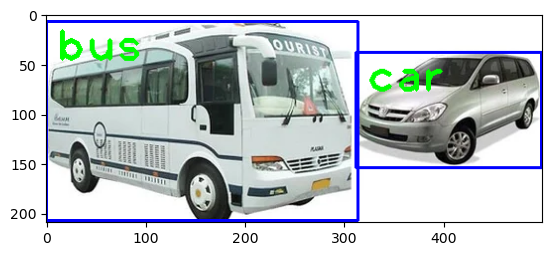

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

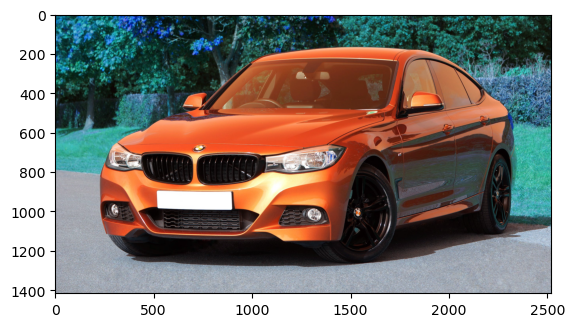

In [15]:
img=cv2.imread("car.png")
plt.imshow(img)